# Dog Breed Analysis
![alt text](puppytraining.jpeg "Title")
1. Data cleaning
2. EDA
3. PCA / Recommendation
    - Euclidian distance
    - PCA with K mean clustering
    - matrix factorization
4. Compare

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [85]:
df = pd.read_csv("dog_data.csv")

In [98]:
df.head(3)

,dog,popularity_rank_c,height_c,weight_c,life_c,Coat_Length_c,coat_c,Affectionate With Family,Good With Young Children,Good With Other Dogs,...,Trainability Level,Energy Level,Barking Level,Mental Stimulation Needs,breed_info,health,grooming,excercise,training,nutrition
6,American-Bulldog,NaN,22.5,78.75,11.0,1.0,Smooth,0,3,3,...,4,0,1,0,American Bulldogs are a well-balanced athletic...,Owning a dog is not just a privilege; it’s a r...,The American Bulldog is considered a healthy b...,Grooming your American Bulldog can be a pretty...,The American Bulldog is an athlete. For puppie...,Early socialization and puppy training classes...
22,Barbado-da-Terceira,NaN,21.0,NaN,13.0,2.0,Wiry,0,4,3,...,5,5,5,0,The Barbado da Terceira is a medium-sized herd...,Owning a dog is not just a privilege; it’s a r...,The Barbado da Terceira has a propensity for...,The Barbado da Terceira should be bathed only ...,Daily exercise is crucial. These dogs are so s...,The Barbado da Terceira is an assertive breed....
195,Plott-Hound,0.153465,22.5,55.00,13.0,NaN,NaN,0,0,0,...,0,0,0,0,"The Plott, a hound with a curious name and a u...",Owning a dog is not just a privilege; it’s a r...,Plotts are generally healthy dogs. A responsib...,"The Plott's smooth, fine, glossy coat can be a...","Plotts are tough, relentless athletes requirin...","The Plott is intelligent, alert, and confident..."
274,Wetterhoun,NaN,23.0,62.50,13.0,2.0,Curly,0,0,0,...,0,0,0,0,"The Wetterhoun, although originally bred for h...",Owning a dog is not just a privilege; it’s a r...,"The Wetterhoun is a pretty healthy breed, even...",The Wetterhoun requires minimal grooming. The...,Daily exercise is good for the physical and me...,The Wetterhoun can be strong willed however th...


In [87]:
df.columns

Index(['Unnamed: 0', 'dog', 'height', 'weight', 'life_expectancy',
       'Affectionate With Family', 'Good With Young Children',
       'Good With Other Dogs', 'Shedding Level', 'Coat Grooming Frequency',
       'Drooling Level', 'Coat Type', 'Coat Length', 'Openness To Strangers',
       'Playfulness Level', 'Watchdog/Protective Nature', 'Adaptability Level',
       'Trainability Level', 'Energy Level', 'Barking Level',
       'Mental Stimulation Needs', 'popularity_rank', 'color', 'marking',
       'breed_info', 'health', 'grooming', 'excercise', 'training',
       'nutrition'],
      dtype='object')

### 1. Data Cleaning
#### we will be cleaning height, weight, life expectancy and poplarity ranking

In [88]:
# Let's do data cleaning for height, weight, life expectancy, popularity ranking


def is_number(string):
    try:
        float(string)
        return True
    except ValueError:
        return False

def hwl_clean(height): # height weight life clean
    height = str(height)
    height_list = height.split('-')
    result = []
    for word in height_list:
        result = result + word.split(" ")
    avg_val = 0
    count = 0
    for i in result:
        if is_number(i):
            count = count +1
            avg_val = avg_val + float(i)
    if count != 0:
        avg_val = avg_val / count
        return avg_val
    else:
        return 0

df['height_c'] = df['height'].apply(hwl_clean)
df['weight_c'] = df['weight'].apply(hwl_clean)
df['life_c'] = df['life_expectancy'].apply(hwl_clean)
df.drop(['height','weight','life_expectancy'], axis = 1,inplace = True)

In [89]:
df[['height_c','weight_c','life_c']].isnull().sum()
# we are missing 10,20,2 values from height, weight and life respectively

height_c    10
weight_c    20
life_c       2
dtype: int64

In [90]:
# Let's do data cleaning for popularity
def popular_clean(pop):
    if type(pop) == float:
        return np.nan
    else:
        rank_list = pop.split(" of ")
        measure = int(rank_list[0]) / int(rank_list[1])
        return 1 - measure

df['popularity_rank_c']= df['popularity_rank'].apply(popular_clean)
df.drop('popularity_rank', axis = 1, inplace = True)
df['Coat Length'].value_counts()

Short           121
Medium          104
Long             37
Short-Medium      6
Medium-Long       3
Short-Long        1
Name: Coat Length, dtype: int64

In [91]:
# Coat Length has to be cleaned
df[df['Coat Length'] == 'Short-Long']
def coatLen_clean(coat):
    if type(coat) != float:
        if "Long" in coat:
            return 3
        elif "Medium" in coat:
            return 2
        else:
            return 1
    else:
        return np.nan

df["Coat_Length_c"] = df["Coat Length"].apply(coatLen_clean)
df.drop("Coat Length", axis = 1, inplace= True)

In [92]:
coat_dict = {}
for i in df["Coat Type"]:
    if type(i) != float:
        coat_list = i.split('-')
        for coat in coat_list:
            if coat not in coat_dict:
                coat_dict[coat] = 1
            else:
                coat_dict[coat] = coat_dict[coat] + 1

new_dict = dict(sorted(coat_dict.items(), key=lambda item: item[1], reverse= True))
new_dict

{'Double': 130,
 'Smooth': 102,
 'Wiry': 35,
 'Wavy': 25,
 'Silky': 21,
 'Curly': 17,
 'Rough': 11,
 'Corded': 4,
 'Hairless': 3}

In [93]:
def coat_clean(coat):
    if type(coat) != float:
        if 'Double' in coat:
            return 'Double'
        elif 'Smooth' in coat:
            return 'Smooth'
        elif 'Wiry' in coat:
            return 'Wiry'
        elif 'Silky' in coat:
            return 'Silky'
        elif 'Curly' in coat:
            return 'Curly'
        elif 'Rough' in coat:
            return 'Rough'
        elif 'Corded' in coat:
            return 'Corded'
        elif 'Hairless' in coat:
            return 'Hairless'
    else:
        return np.nan
df['coat_c'] = df['Coat Type'].apply(coat_clean)
df.drop("Coat Type", axis = 1, inplace = True)
df.drop("marking", axis = 1, inplace = True)
df.drop("color", axis = 1, inplace = True)

In [94]:
# reorganize in the way that I like to see

df = df[['dog','popularity_rank_c','height_c', 'weight_c', 'life_c','Coat_Length_c', 'coat_c','Affectionate With Family',
       'Good With Young Children', 'Good With Other Dogs', 'Shedding Level',
       'Coat Grooming Frequency', 'Drooling Level', 'Openness To Strangers',
       'Playfulness Level', 'Watchdog/Protective Nature', 'Adaptability Level',
       'Trainability Level', 'Energy Level', 'Barking Level',
       'Mental Stimulation Needs', 'breed_info', 'health', 'grooming',
       'excercise', 'training', 'nutrition']]

### 2. EDA
#### 1) histogram for qunatative data
#### 2) histogram for categorical data

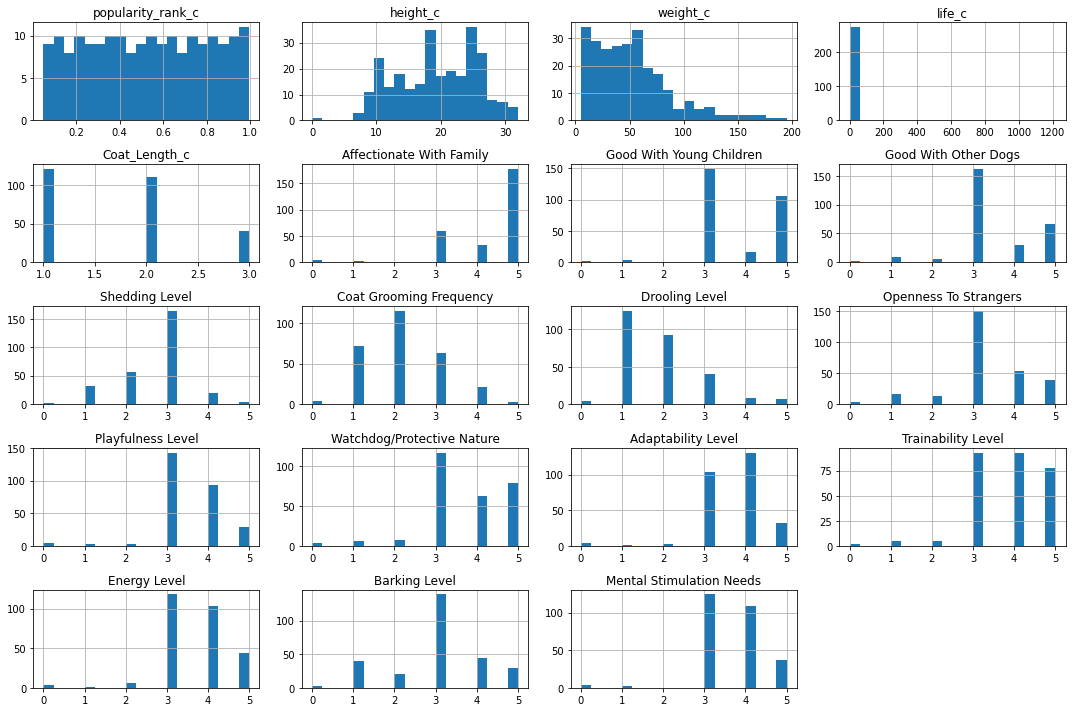

In [95]:
df.hist(bins = 20, figsize = (15,10))
plt.tight_layout()
plt.show()

In [105]:
numeric_data = df.select_dtypes(include=[np.number])
categorical_data = df.select_dtypes(exclude=[np.number])
list(categorical_data.columns)

['dog',
 'coat_c',
 'breed_info',
 'health',
 'grooming',
 'excercise',
 'training',
 'nutrition']

/var/folders/ph/yfqxnlss1ds28x8n8wzmqfg00000gn/T/ipykernel_61824/153697987.py:8: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



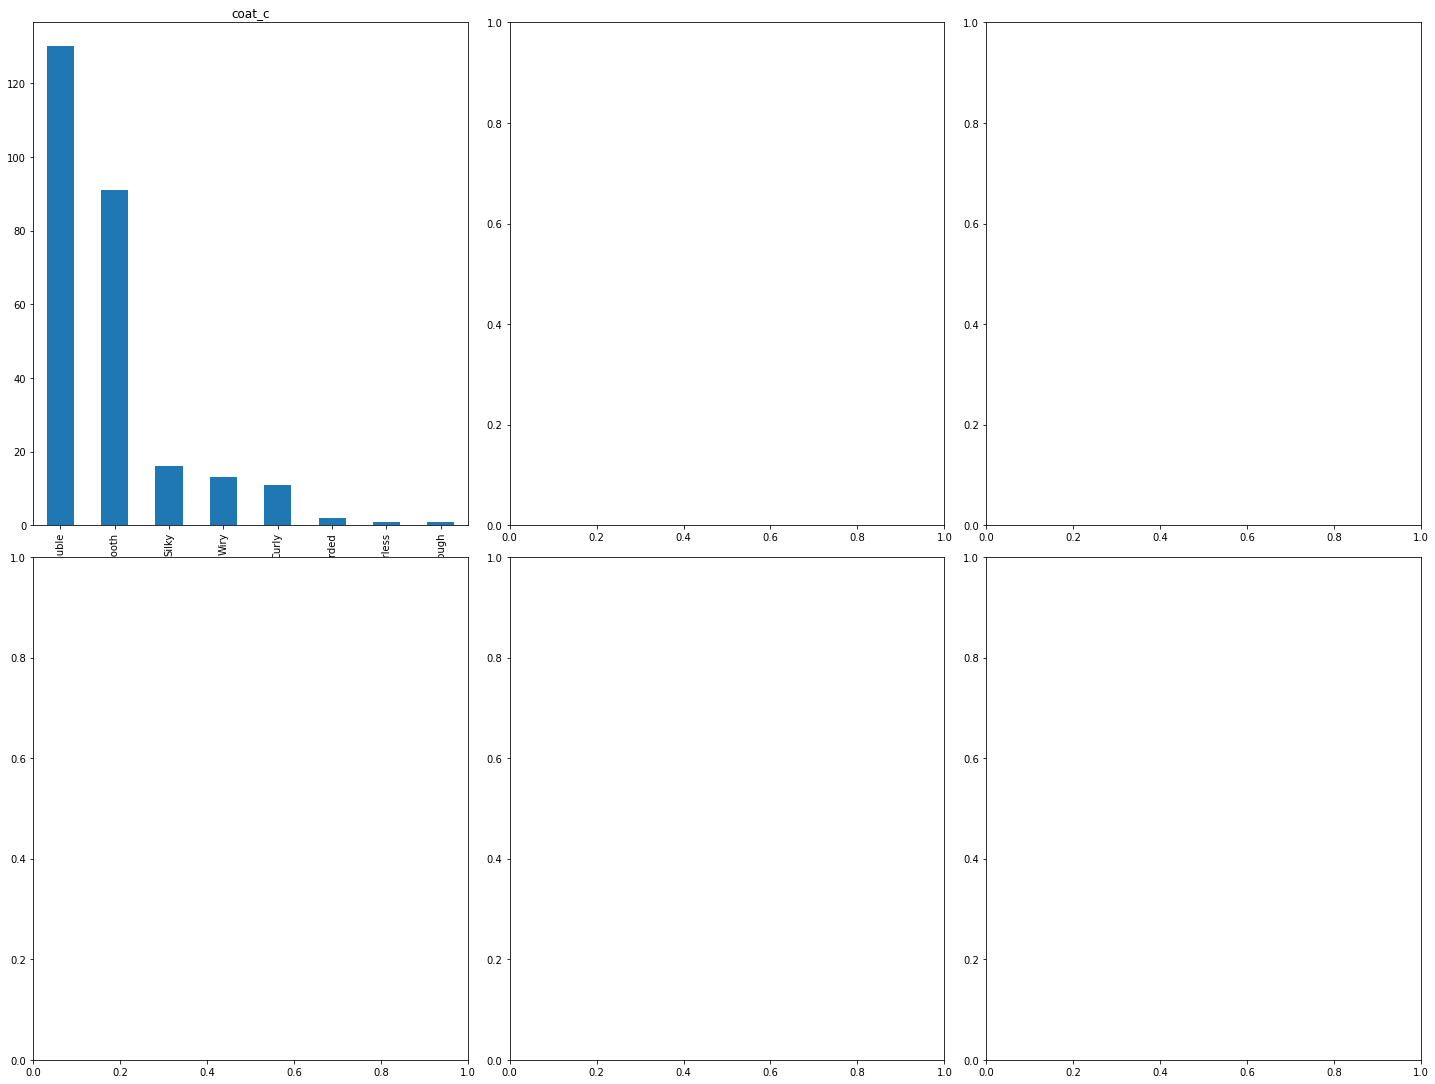

In [107]:
categorical_features = ['coat_c']
fig, ax = plt.subplots(2, 3, figsize = (20,15))
fig.tight_layout()
axe = ax.ravel()

for i, categorical_feature in enumerate(df[categorical_features]):
    df[categorical_feature].value_counts().head(10).plot(kind = "bar", ax=axe[i]).set_title(categorical_feature)
fig.show()

# print(len(df.columns))

# # numeric_data = df.select_dtypes(include=[np.number])
# # categorical_data = df.select_dtypes(exclude=[np.number])
# categorical_features

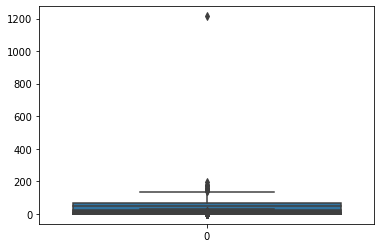

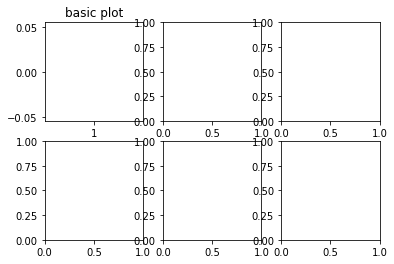

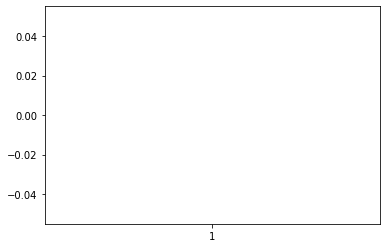

In [118]:
numeric_data = df.select_dtypes(include=[np.number]) 
import seaborn as sns

fig, axs = plt.subplots(2, 3)

# basic plot
axs[0, 0].boxplot(df[numeric_data.columns[1]].values)
axs[0, 0].set_title('basic plot')

fig, ax = plt.subplots()
ax.boxplot(df[numeric_data.columns[1]])

plt.show()


 

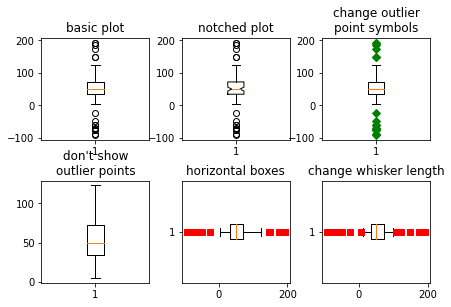

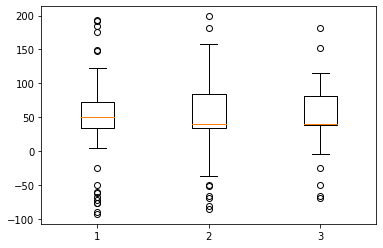

In [119]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Polygon


# Fixing random state for reproducibility
np.random.seed(19680801)

# fake up some data
spread = np.random.rand(50) * 100
center = np.ones(25) * 50
flier_high = np.random.rand(10) * 100 + 100
flier_low = np.random.rand(10) * -100
data = np.concatenate((spread, center, flier_high, flier_low))

fig, axs = plt.subplots(2, 3)

# basic plot
axs[0, 0].boxplot(data)
axs[0, 0].set_title('basic plot')

# notched plot
axs[0, 1].boxplot(data, 1)
axs[0, 1].set_title('notched plot')

# change outlier point symbols
axs[0, 2].boxplot(data, 0, 'gD')
axs[0, 2].set_title('change outlier\npoint symbols')

# don't show outlier points
axs[1, 0].boxplot(data, 0, '')
axs[1, 0].set_title("don't show\noutlier points")

# horizontal boxes
axs[1, 1].boxplot(data, 0, 'rs', 0)
axs[1, 1].set_title('horizontal boxes')

# change whisker length
axs[1, 2].boxplot(data, 0, 'rs', 0, 0.75)
axs[1, 2].set_title('change whisker length')

fig.subplots_adjust(left=0.08, right=0.98, bottom=0.05, top=0.9,
                    hspace=0.4, wspace=0.3)

# fake up some more data
spread = np.random.rand(50) * 100
center = np.ones(25) * 40
flier_high = np.random.rand(10) * 100 + 100
flier_low = np.random.rand(10) * -100
d2 = np.concatenate((spread, center, flier_high, flier_low))
# Making a 2-D array only works if all the columns are the
# same length.  If they are not, then use a list instead.
# This is actually more efficient because boxplot converts
# a 2-D array into a list of vectors internally anyway.
data = [data, d2, d2[::2]]

# Multiple box plots on one Axes
fig, ax = plt.subplots()
ax.boxplot(data)

plt.show()

### 3. PCA
#### I want to see which dogs are "similar" in sense

In [ ]:
# for pca, we will be choosing
df.columns

Index(['dog', 'popularity_rank_c', 'height_c', 'weight_c', 'life_c',
       'Coat_Length_c', 'coat_c', 'Affectionate With Family',
       'Good With Young Children', 'Good With Other Dogs', 'Shedding Level',
       'Coat Grooming Frequency', 'Drooling Level', 'Openness To Strangers',
       'Playfulness Level', 'Watchdog/Protective Nature', 'Adaptability Level',
       'Trainability Level', 'Energy Level', 'Barking Level',
       'Mental Stimulation Needs', 'breed_info', 'health', 'grooming',
       'excercise', 'training', 'nutrition'],
      dtype='object')

In [ ]:
df_pca = df.drop(['breed_info', 'health', 'grooming', 'excercise', 'training', 'nutrition'], axis =1) # drop columns with text

print(df_pca.shape)
df_pca.dropna(inplace = True)
print(df_pca.shape)

(276, 21)
(180, 21)


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [ ]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_pca.drop(['dog','coat_c'], axis = 1))

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(
    init="random",
     n_clusters=3,
    n_init=10,
    max_iter=300,
    random_state=42 )
kmeans.fit(scaled_data)

KMeans(init='random', n_clusters=3, random_state=42)

[0.2132907  0.15888459]


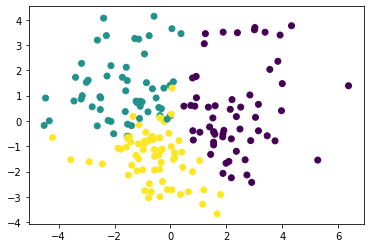

In [ ]:
pca = PCA(n_components=2)
components = pca.fit_transform(scaled_data)
print(pca.explained_variance_ratio_)
plt.scatter(components[:,0],components[:,1], c= kmeans.labels_)

In [ ]:
import plotly.express as px
df1 = components
fig = px.scatter(df1, x=df1[:,0], y=df1[:,1], color = kmeans.labels_, hover_name = df_pca.dog)
fig.show()